In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

In [3]:
data = np.random.exponential(scale=2, size=1000)
df = pd.DataFrame({"Salary":data})

In [4]:
df.head()

,Salary
0,1.049355
1,5.224832
2,2.861319
3,0.836611
4,0.279694


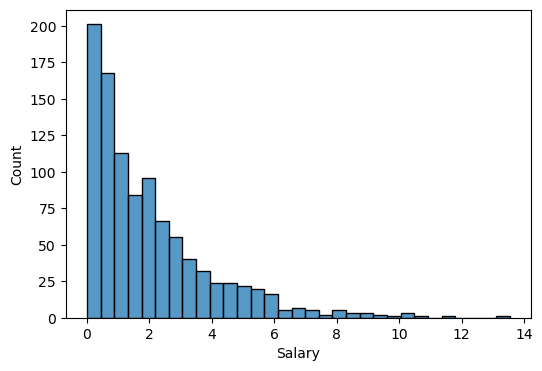

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df.Salary)
plt.show()

In [9]:
df.Salary.skew()

1.735814947638023

In [10]:
df["updated_Salary"] , lambda_val = boxcox(df.Salary)

In [11]:
df.head()

,Salary,updated_Salary
0,1.049355,0.048484
1,5.224832,2.072752
2,2.861319,1.211544
3,0.836611,-0.174263
4,0.279694,-1.082032


In [12]:
lambda_val

0.2638326795494673

In [13]:
df.updated_Salary.skew()

-0.05659518713838543

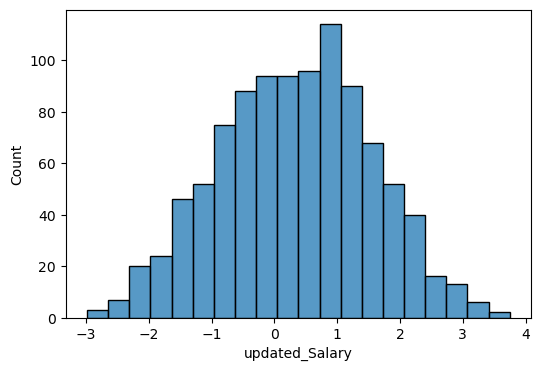

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(df.updated_Salary)
plt.show()

In [16]:
data = np.random.exponential(scale=2, size=1000)
data = 10 - data
df = pd.DataFrame({"Salary2": data})

In [17]:
df.head()

,Salary2
0,8.692731
1,7.084303
2,4.383095
3,6.417124
4,7.486793


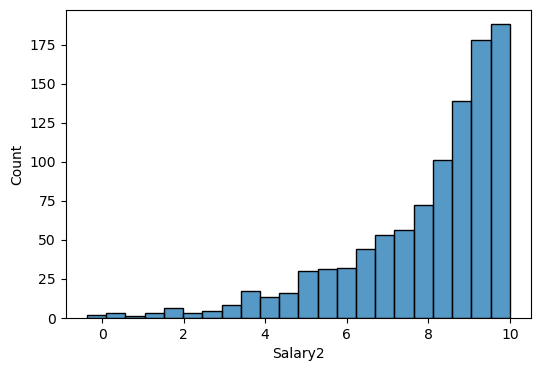

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(df.Salary2)
plt.show()

In [19]:
df.Salary2.skew()

-1.438228520034566

In [26]:
df["reflex_Salary"] = (df.Salary2.max() - df.Salary2) + 1

In [27]:
df.head()

,Salary2,reflex_Salary
0,8.692731,2.304783
1,7.084303,3.913211
2,4.383095,6.614419
3,6.417124,4.580390
4,7.486793,3.510722


In [29]:
max(df.reflex_Salary), min(df.reflex_Salary)

(11.366926828726786, 1.0)

In [30]:
df["transformed_salary"] = np.log(df.reflex_Salary)

In [31]:
df.transformed_salary.skew()

0.33838219339800296

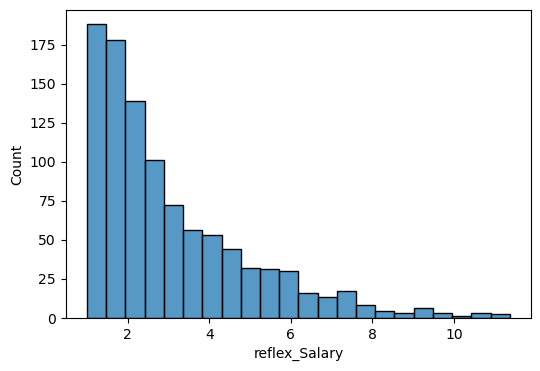

In [32]:
plt.figure(figsize=(6,4))
sns.histplot(df.reflex_Salary)
plt.show()

In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [38]:
data = pd.read_csv(r"C:\Users\DELL\Downloads\test2.csv")

In [39]:
data.head()

,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,NaN,IT,62000.0
4,4,Eve,29.0,HR,NaN


In [40]:
data.shape

(6, 5)

In [42]:
data.Age = data.Age.fillna(value = data.Age.mean())
data.Salary = data.Salary.fillna(value= data.Salary.mean())

In [43]:
data

,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,28.8,IT,62000.0
4,4,Eve,29.0,HR,58400.0
5,5,Alice,25.0,HR,50000.0


In [44]:
encoder = LabelEncoder()

In [46]:
data["transformed_name"] = encoder.fit_transform(data.Name)

In [47]:
data.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name
0,0,Alice,25.0,HR,50000.0,0
1,1,Bob,30.0,IT,60000.0,1
2,2,Charlie,35.0,Finance,70000.0,2
3,3,David,28.8,IT,62000.0,3
4,4,Eve,29.0,HR,58400.0,4


In [53]:
encoder2 = OneHotEncoder(sparse_output=False)

In [54]:
encoded = encoder2.fit_transform(data[["Department"]])

In [55]:
encoder2.get_feature_names_out()

array(['Department_Finance', 'Department_HR', 'Department_IT'],
      dtype=object)

In [56]:
encoded

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [57]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [58]:
scaler = StandardScaler()

In [59]:
data["scaled_salary"] = scaler.fit_transform(data[["Salary"]])

In [60]:
data.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name,scaled_salary
0,0,Alice,25.0,HR,50000.0,0,-1.205755
1,1,Bob,30.0,IT,60000.0,1,0.229668
2,2,Charlie,35.0,Finance,70000.0,2,1.665091
3,3,David,28.8,IT,62000.0,3,0.516752
4,4,Eve,29.0,HR,58400.0,4,0.000000


In [62]:
data = pd.read_csv(r"C:\Users\DELL\Downloads\data_visualization.csv")

In [63]:
data.head()

,Unnamed: 0,Student_ID,Name,Gender,Department,Age,Math_Score,Science_Score,Attendance_Percentage,Study_Hours_per_Week
0,0,1,Aarav,Male,CS,21,78,75,85,10
1,1,2,Diya,Female,IT,22,85,88,90,12
2,2,3,Rohan,Male,CS,20,90,85,95,15
3,3,4,Sneha,Female,ECE,21,67,70,80,8
4,4,5,Arjun,Male,IT,23,88,90,92,14


<Figure size 640x480 with 0 Axes>

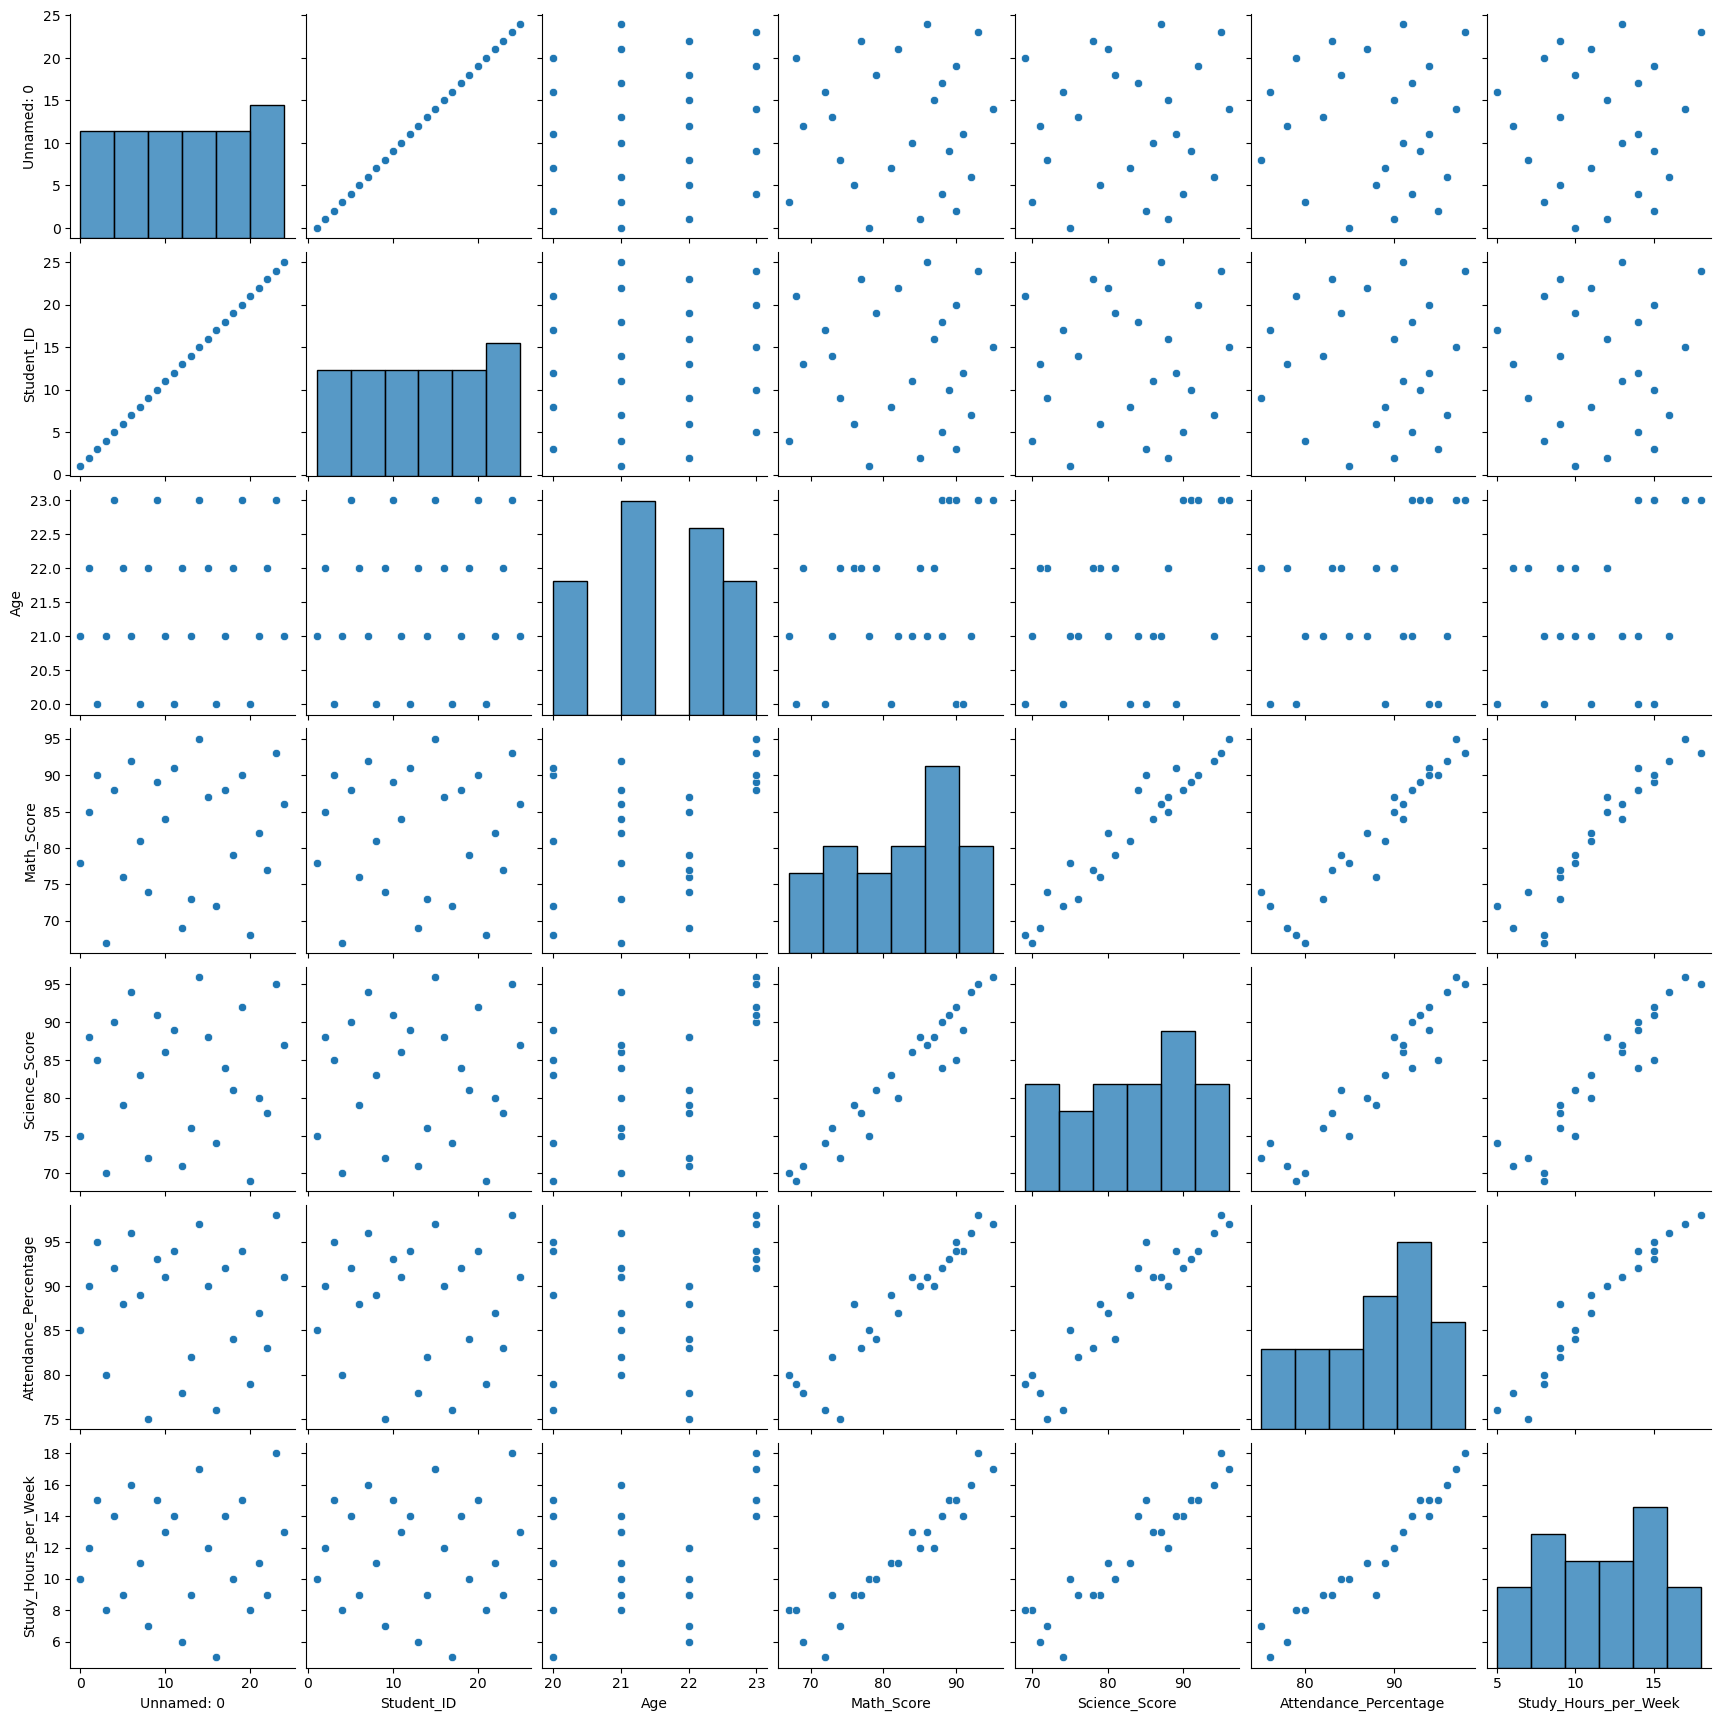

In [65]:
plt.figure()
sns.pairplot(data)

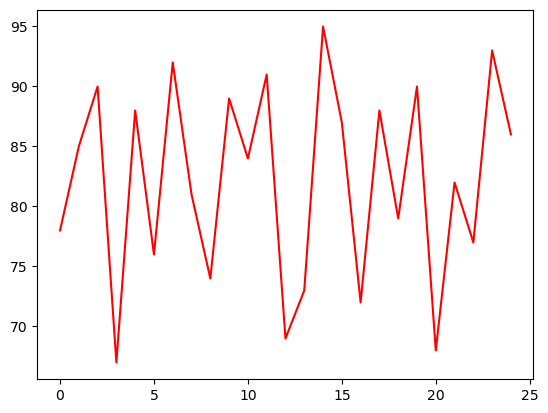

In [69]:
plt.plot(data.Math_Score , color="red")
plt.show()

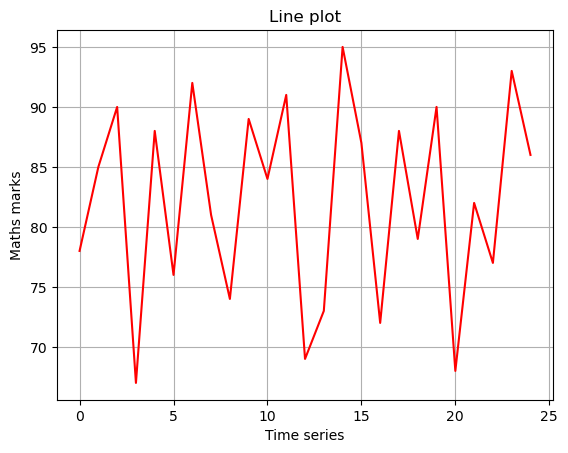

In [70]:
plt.plot(data.Math_Score , color="red")
plt.grid()
plt.title("Line plot")
plt.xlabel("Time series")
plt.ylabel("Maths marks")
plt.show()

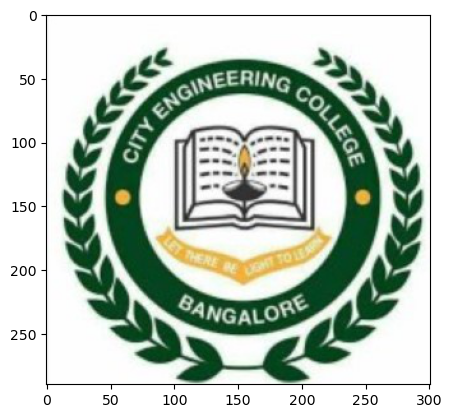

In [73]:
img = plt.imread(r"C:\Users\DELL\Pictures\image.jpg.jpg")
plt.imshow(img)   
                 